<a href="https://colab.research.google.com/github/pouriazzz/jupyter_files/blob/main/model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
train_path = "/content/drive/MyDrive/RGBS/Train"
test_path = "/content/drive/MyDrive/RGBS/Test"
validation_path = "/content/drive/MyDrive/RGBS/Validation"

In [2]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np

In [3]:
train = keras.utils.image_dataset_from_directory(
                          directory=train_path,
                          labels="inferred",
                          label_mode="binary",
                          class_names=["Benign","Malware"],
                          batch_size=32,
                          image_size=(256, 256),
                          shuffle=True,
                          seed=None,
                          validation_split=None,
                          subset=None,
                          interpolation="bilinear",
                          follow_links=False,
                          crop_to_aspect_ratio=False,

)

Found 8715 files belonging to 2 classes.


In [4]:
test = keras.utils.image_dataset_from_directory(
                          directory=test_path,
                          labels="inferred",
                          label_mode="binary",
                          class_names=["Benign","Malware"],
                          batch_size=32,
                          image_size=(256, 256),
                          shuffle=True,
                          seed=None,
                          validation_split=None,
                          subset=None,
                          interpolation="bilinear",
                          follow_links=False,
                          crop_to_aspect_ratio=False,

)

Found 2482 files belonging to 2 classes.


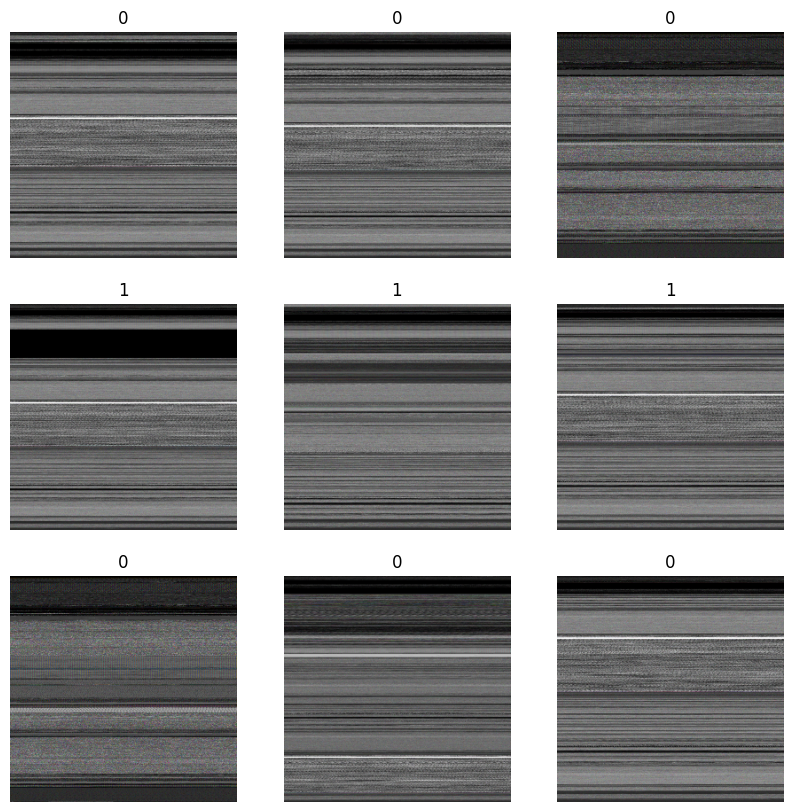

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [6]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train = train.map(process)
test = test.map(process)

In [7]:
from keras import regularizers


model = Sequential()
model.add(Conv2D(128,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())
model.add(Dropout(0.7))

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.6))

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.5))

model.add(Conv2D(16, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu",kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5)))
model.add(Dense(64,activation="relu",kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5)))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 128)     0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 128, 128, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 64)        0

In [8]:
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer = opt , loss = "binary_crossentropy" , metrics = ['accuracy'])

In [9]:
history = model.fit(train,epochs = 25 ,batch_size = 128, validation_data = test)

Epoch 1/25
273/273 [==============================] - 1749s 6s/step - loss: 0.7480 - accuracy: 0.6482 - val_loss: 0.7059 - val_accuracy: 0.7091
Epoch 2/25
273/273 [==============================] - 110s 398ms/step - loss: 0.5276 - accuracy: 0.8022 - val_loss: 0.6433 - val_accuracy: 0.6241
Epoch 3/25
273/273 [==============================] - 108s 393ms/step - loss: 0.4164 - accuracy: 0.8545 - val_loss: 0.4136 - val_accuracy: 0.8654
Epoch 4/25
273/273 [==============================] - 99s 359ms/step - loss: 0.3669 - accuracy: 0.8754 - val_loss: 0.3799 - val_accuracy: 0.8848
Epoch 5/25
273/273 [==============================] - 99s 357ms/step - loss: 0.3390 - accuracy: 0.8815 - val_loss: 0.3455 - val_accuracy: 0.8896
Epoch 6/25
273/273 [==============================] - 98s 357ms/step - loss: 0.3188 - accuracy: 0.8912 - val_loss: 0.3364 - val_accuracy: 0.8936
Epoch 7/25
273/273 [==============================] - 99s 357ms/step - loss: 0.3059 - accuracy: 0.8991 - val_loss: 0.3158 - val_a

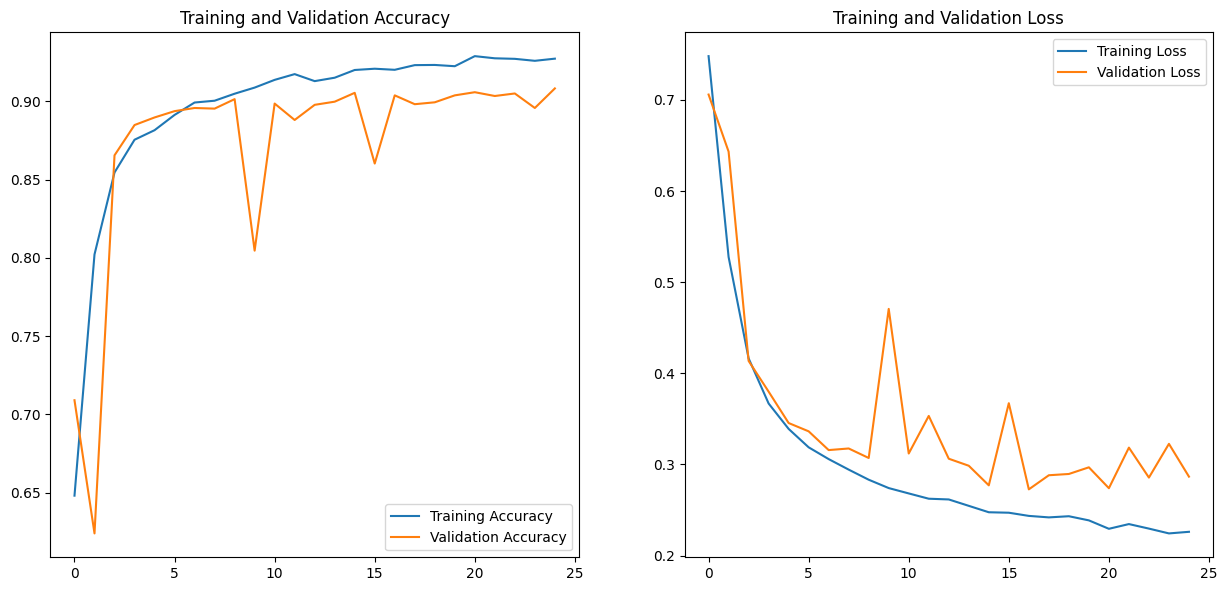

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1]:
validation = keras.utils.image_dataset_from_directory(
                          directory=validation_path,
                          labels="inferred",
                          label_mode="binary",
                          class_names=["Benign","Malware"],
                          batch_size=32,
                          image_size=(256, 256),
                          shuffle=True,
                          seed=None,
                          validation_split=None,
                          subset=None,
                          interpolation="bilinear",
                          follow_links=False,
                          crop_to_aspect_ratio=False,

)
pred = model.predict(validation)
pred = np.argmax(pred, axis=1)
cm = confusion_matrix(validation, pred)

con = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=validation)

fig, ax = plt.subplots(figsize=(10, 10))
con = con.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

NameError: name 'keras' is not defined